In [60]:
import pandas as pd
import matplotlib.pyplot as plt

files = [
    "example_1.txt",
    "example_2.txt",
    "example_3.txt",
    "example_4.txt"
]

df_memory_usage = pd.DataFrame()
df_cpu_usage = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, sep=";")
    df_memory_usage[file] = df.iloc[:, 0]
    df_cpu_usage[file] = df.iloc[:, 1]


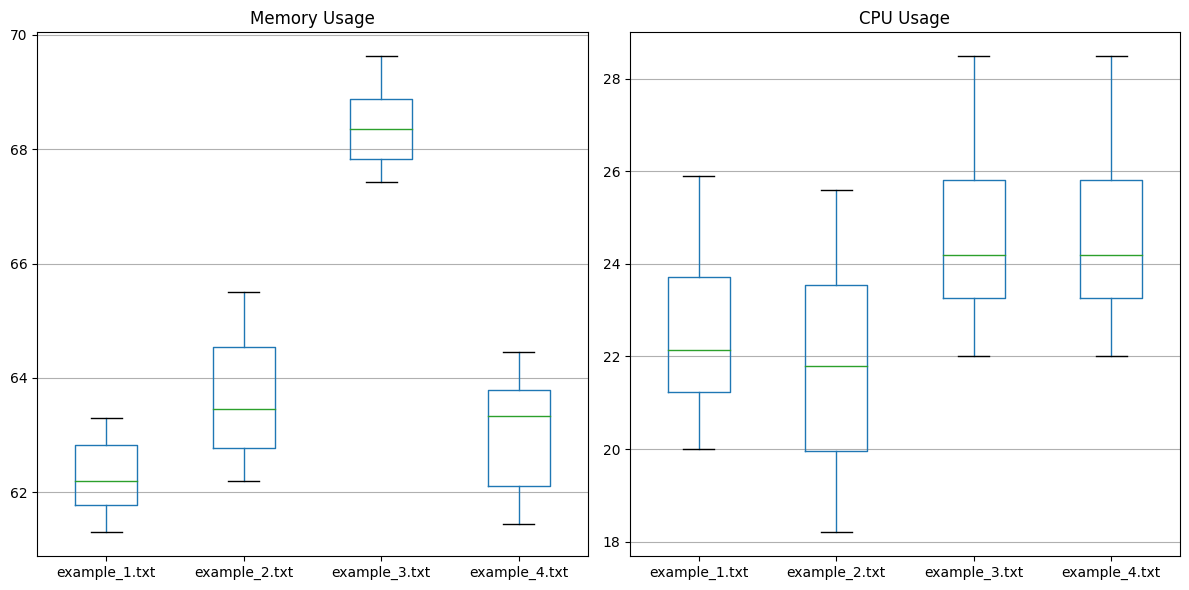

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
final_plots = [
    (df_memory_usage, ax1, "Memory Usage [%]"),
    (df_cpu_usage, ax2, "CPU Usage [%]")
]

for (final_df, sub_ax, title) in final_plots:
    final_df.boxplot(ax=sub_ax, grid=False)
    sub_ax.grid(axis='y')
    sub_ax.set_title(title)

plt.tight_layout()
plt.show()